In [14]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, decomposition, ensemble,discriminant_analysis, random_projection)
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy import stats
import seaborn as sns; sns.set()

In [4]:
# load  preprocessed dataset
data=pd.read_csv("train.csv")
#convert data from dataframe to matrix
data_new=data.values

#Split data into training data (X) and target label(Y)
X=data_new[:,:-1] #gets elements of array but the last one
Y=data_new[:,-1]

In [5]:
from time import time
from sklearn.decomposition import PCA

## Computing PCA
print("Computing PCA projection")
t0 = time()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
tf = time() - t0
print ("PCA done! Time elapsed: {} seconds".format(round(tf, 3)))


Computing PCA projection
PCA done! Time elapsed: 2.725 seconds


In [6]:
pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
#pca_df['pca3'] = pca_result[:,2]
#pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.9258508  0.05498479]


In [17]:
print('Cumulative variance explained by 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 0.9808355887246557


In [18]:
X_new = pca_df[['pca1','pca2']] # taking first and second principal component
print(X.shape)
print(pca_result.shape)
print(X_new.shape)

(1047115, 20)
(1047115, 2)
(1047115, 2)


In [8]:
###computing for all components
print("Computing PCA projection for all components")
t0 = time()
pca1 = PCA()
pca_result1 = pca1.fit_transform(X)
tf = time() - t0
print ("PCA for all components done! Time elapsed: {} seconds".format(round(tf, 3)))

Computing PCA projection for all components
PCA for all components done! Time elapsed: 0.963 seconds


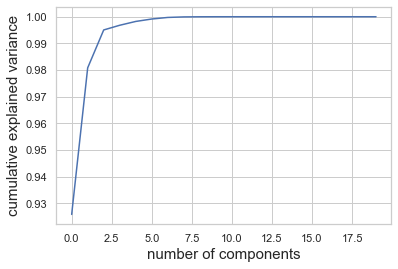

In [15]:
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components',fontsize = 15)
plt.ylabel('cumulative explained variance',fontsize = 15);
plt.show()

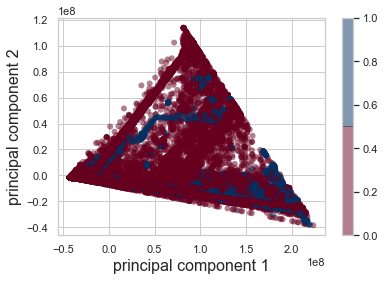

In [16]:
%matplotlib inline
rc1={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 16.0, 'axes.titlesize': 16}
plt.rcParams.update(**rc1)
sns.set(rc=rc1)
sns.set_style("whitegrid")

plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('RdBu', 2))
plt.xlabel('principal component 1', fontsize = 16)
plt.ylabel('principal component 2',fontsize = 16)
plt.colorbar();
plt.show()